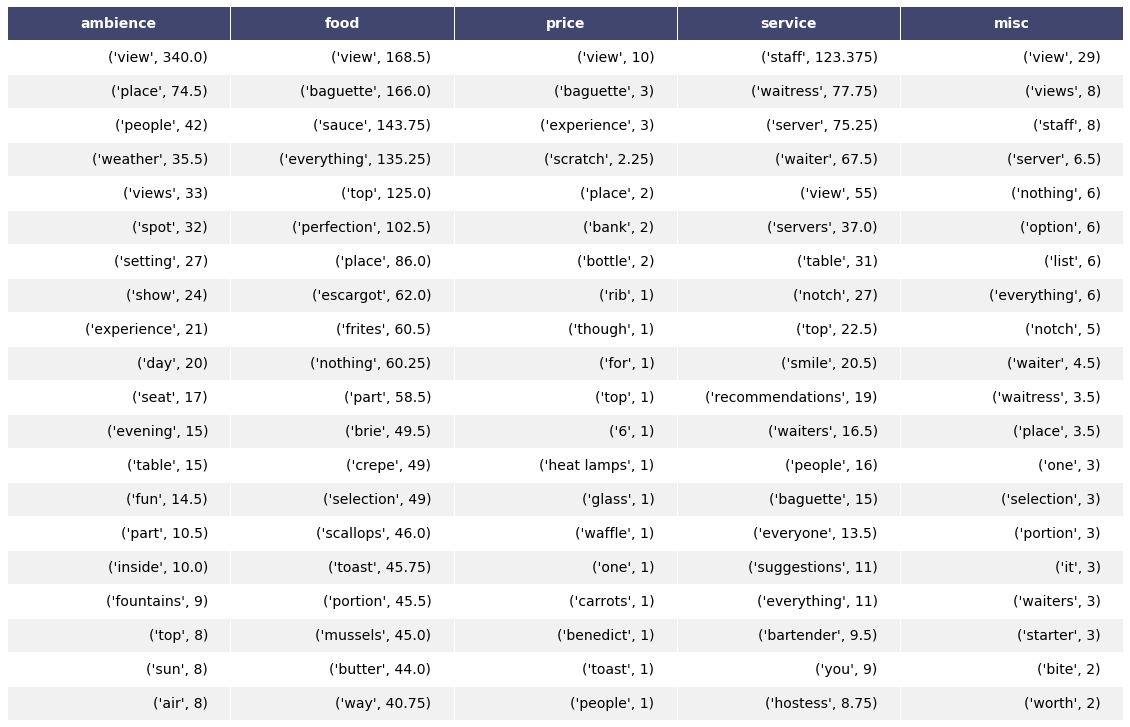

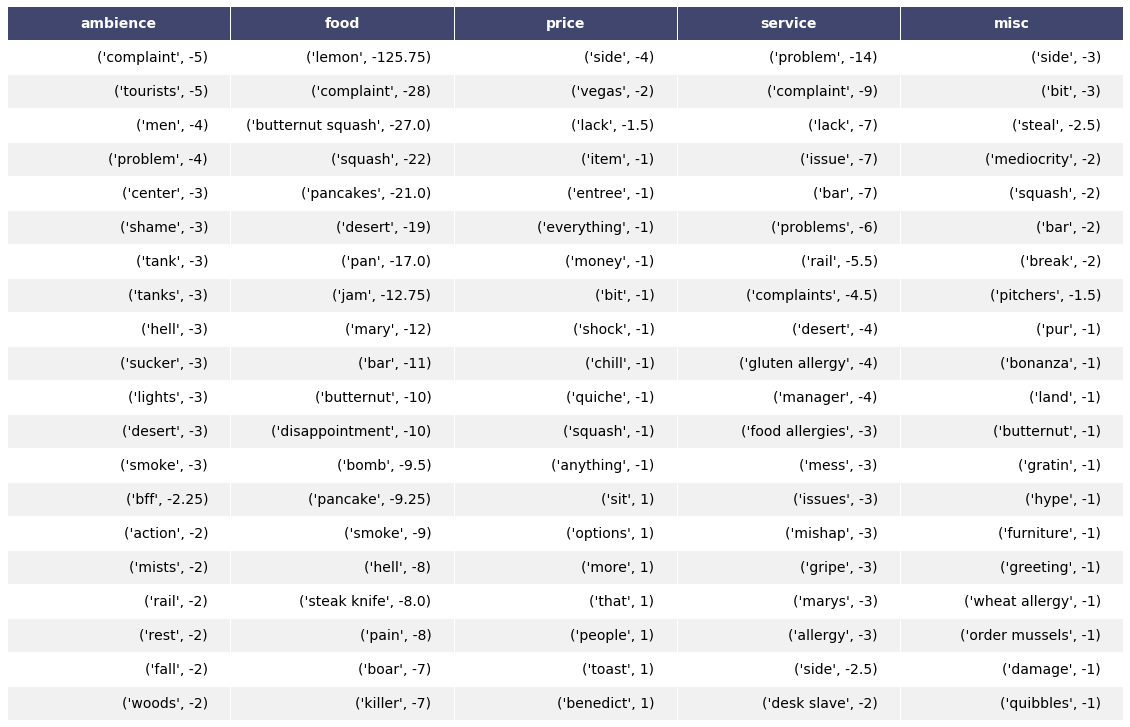

In [13]:
#######################################################
 
##### Applting Sentiment Analysis to Yelp Reviews######

#######################################################


import os

import pandas as pd

import numpy as np

import pickle

from collections import Counter, defaultdict

import numpy as np

import matplotlib.pyplot as plt

import re

import six

from math import pi

# nlp libraries/api

# model has been trained with naive bayes 

# initial processing was done with the entire dataset that allowed by my computer

# The French Bistro Mon Ami Gabi in Las Vegas was selected as a demonstration

os.getcwd()

os.chdir('/Users/yujingqi/Downloads/2019YelpDataChallenge')

monamigabi2019_aspect_sent = pickle.load(open("aspect_sent_moamigabi2019NEW.pkl","rb"))

monamigabi2019_terms_dict  = pickle.load(open("terms_dict_moamigabiNEW.pkl","rb"))

lowest = defaultdict()

highest = defaultdict()

for i in monamigabi2019_terms_dict:

    if monamigabi2019_terms_dict[i]:
    
        highest[i] = monamigabi2019_terms_dict[i].most_common()[:20]
        
        lowest[i] = monamigabi2019_terms_dict[i].most_common()[-20:]
        
highest_df = pd.DataFrame(highest)

lowest_df = pd.DataFrame(lowest).iloc[::-1]


def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     
                     bbox=[0, 0, 1, 1], header_columns=0,
                     
                     ax=None, **kwargs):
    if ax is None:
       
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        
        fig, ax = plt.subplots(figsize=size)
        
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        
        cell.set_edgecolor(edge_color)
        
        if k[0] == 0 or k[1] < header_columns:
            
            cell.set_text_props(weight='bold', color='w')
            
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

# The first table shows the positive content within each aspect consumers mentioned in their reviews

# it is understandable that as a French Bistro baguette and view are (positively) mentioned a lot 

# It is also apparent from the table below that nouns such as staff, waitress, server, and waiter 

# appear frequently under service

render_mpl_table(highest_df, header_columns=0, col_width=4.0)


# Table2 lists the top 20 negative things for each aspect

# from the table we can infer that squash served by this restaurant is not on par with what is expected

render_mpl_table(lowest_df, header_columns=0, col_width=4.0)


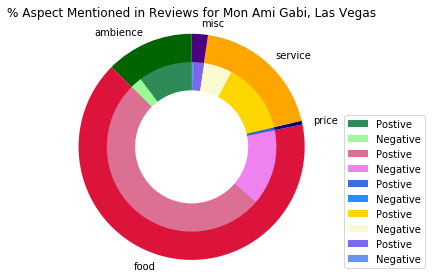

In [11]:
monamigabi2019_aspect_sentT=pd.DataFrame(monamigabi2019_aspect_sent).T

labels = monamigabi2019_aspect_sentT.index

sizes = monamigabi2019_aspect_sentT['pos'] + monamigabi2019_aspect_sentT['neg']


labels_div = ['Postive','Negative','Postive','Negative','Postive','Negative','Postive','Negative','Postive','Negative']

sizes_div = [monamigabi2019_aspect_sentT.pos[0],monamigabi2019_aspect_sentT.neg[0],
            
             monamigabi2019_aspect_sentT.pos[1],monamigabi2019_aspect_sentT.neg[1],
            
             monamigabi2019_aspect_sentT.pos[2],monamigabi2019_aspect_sentT.neg[2],
            
             monamigabi2019_aspect_sentT.pos[3],monamigabi2019_aspect_sentT.neg[3],
            
             monamigabi2019_aspect_sentT.pos[4],monamigabi2019_aspect_sentT.neg[4]]

colors = ['darkgreen','crimson','navy','orange','indigo']

colors_div = ['seagreen','palegreen','palevioletred','violet','royalblue','dodgerblue','gold','lightgoldenrodyellow','mediumslateblue','cornflowerblue']


# Plot

pie1=plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)

pie2=plt.pie(sizes_div,colors=colors_div,radius=0.75,startangle=90)

centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)

fig = plt.gcf()

fig.gca().add_artist(centre_circle)

plt.legend(pie2[0],labels_div,bbox_to_anchor=(1, 0, 0.3, 1), loc="lower right")

plt.axis('equal')

plt.title('% Aspect Mentioned in Reviews for Mon Ami Gabi, Las Vegas')

plt.tight_layout()

plt.show()


# the graph below shows the distribution of positive and negative reviews

# As illustrated by the graph, I 5 aspects are considered for sentiment analysis

# The outer ring shows the breakdown of 5 aspects

# The inner ring shows the full breakdown of positive and negative sentiments within each aspect

# because the chosen restaurant has a positive average review

# It is expected that within each aspect, there are more positive than negative comments

# Being restaurants also imply suggest that there are more sentimental reviews on food than other four aspects



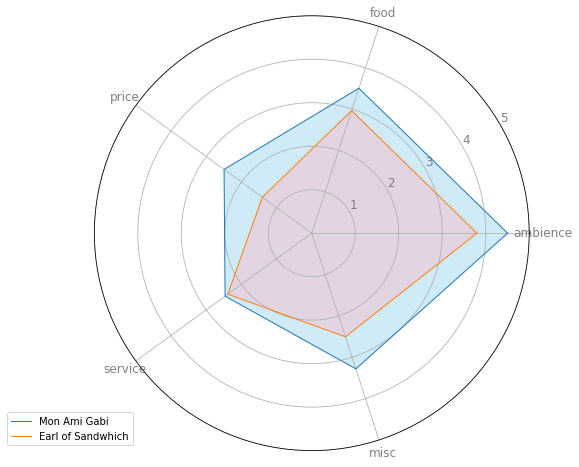

In [14]:
monamigabi2019df = pickle.load(open("aspect_sent_moamigabi2019NEW.pkl","rb"))

earlofsandwich = pickle.load(open("aspect_sent_earlofsandwichNEW.pkl","rb"))

monamigabi2019_aspect_sentT=pd.DataFrame(monamigabi2019df).T

earlofsandwichdf_aspect_sentT =pd.DataFrame(earlofsandwich).T

monamigabi2019_aspect_sentT["pos/neg"]=monamigabi2019_aspect_sentT.pos/monamigabi2019_aspect_sentT.neg

earlofsandwichdf_aspect_sentT["pos/neg"]=earlofsandwichdf_aspect_sentT.pos/earlofsandwichdf_aspect_sentT.neg


labels = monamigabi2019_aspect_sentT.index


# number of vars we are plotting

num_vars = len(labels)


angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]

angles += angles[:1]


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], labels, color='grey', size=12)

plt.yticks(np.arange(1, 6), ['1', '2', '3', '4', '5'],

           color='grey', size=12)

plt.ylim(0, 5)

ax.set_rlabel_position(30)


series_1_values = monamigabi2019_aspect_sentT["pos/neg"].values.flatten().tolist()

series_1_values.append(series_1_values[0])


series_2_values = earlofsandwichdf_aspect_sentT["pos/neg"].values.flatten().tolist()

series_2_values.append(series_2_values[0])
 
ax.plot(angles, series_1_values, linewidth=1, linestyle='solid',label = "Mon Ami Gabi")

ax.fill(angles, series_1_values, 'skyblue', alpha=0.4)
 

ax.plot(angles, series_2_values, linewidth=1, linestyle='solid', label = "Earl of Sandwhich")

ax.fill(angles, series_2_values, 'lightpink', alpha=0.4)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

# this radar plot shows the ratio between positive and negative sentiments

# along each of the five dimensions

# Two different type of restaurants are selected, one French Bistro

# and the other is more like casual food

# it looks like despite different types, people seemto be very consistent along 

# the dimension of service.

# this suggests that regardless of type, people care about service equally

# it also makes sense that consumers say relatively more positive things about ambience

# when they can actually sit in and enjoy different views

# The reason why price stands out is perhaps that for a chain restaurant like Earl of Sandwhich, people perhaps

# don't have very strong feelings towards prices as the food is not expensive to begin with.

# For a French bistro, on the other hand, people may have some prior beliefs and 

# if the price is reasonable, they would be positively surprised, leading to positive comments on price.